# Plots of sentiment and hate-speech prediction tasks on CrowdTangle dataset




## Installs and imports

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

import numpy as np
import pandas as pd

## Load the `CrowdTangle` dataset
> This is the dataset over which sentiment and hate speech analyses have already been performed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/My Drive/CT_sentiment_hate.csv')

In [ ]:
df.shape

(50000, 42)

In [ ]:
df.columns

Index(['account.name', 'account.handle', 'platformId', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'subscriberCount', 'Followers at Posting', 'date', 'Post Created Date',
       'Post Created Time', 'type', 'totalInteraction',
       'statistics.actual.likeCount', 'statistics.actual.commentCount',
       'statistics.actual.shareCount', 'statistics.actual.loveCount',
       'statistics.actual.wowCount', 'statistics.actual.hahaCount',
       'statistics.actual.sadCount', 'statistics.actual.angryCount',
       'statistics.actual.careCount', 'Video Share Status', 'Is Video Owner?',
       'statistics.actual.videoPostViewCount',
       'statistics.actual.videoTotalViewCount',
       'statistics.actual.videoAllCrosspostsViewCount', 'Video Length',
       'postUrl', 'message', 'expandedLinks.original',
       'expandedLinks.expanded', 'imageText', 'title', 'description',
       'brandedContentSponsor.platformId', 'brandedContentSponsor.name',
 

## Declare labels

In [ ]:
labels_ids_sentiment = {'negative sentiment': 0, 'neutral sentiment': 1, 'positive sentiment':2}


labels_ids_hate = {'non-hateful': 0, 'hateful': 1}

## Sentiment analysis results

Overall statistics of sentiment predictions

In [ ]:
print ("Percentage of negative sentiment content within the dataset", len(df [df['messageSentiment.score'] == 0])*100/len(df),'%')
print ("Total number of neutral sentiment content within the dataset", len(df [df['messageSentiment.score'] == 1])*100/len(df),'%')
print ("Total number of positive sentiment content within the dataset", len(df [df['messageSentiment.score'] == 2])*100/len(df),'%')

Percentage of negative sentiment content within the dataset 60.716 %
Total number of neutral sentiment content within the dataset 24.94 %
Total number of positive sentiment content within the dataset 14.344 %


Histograms of the predicted sentiment scores

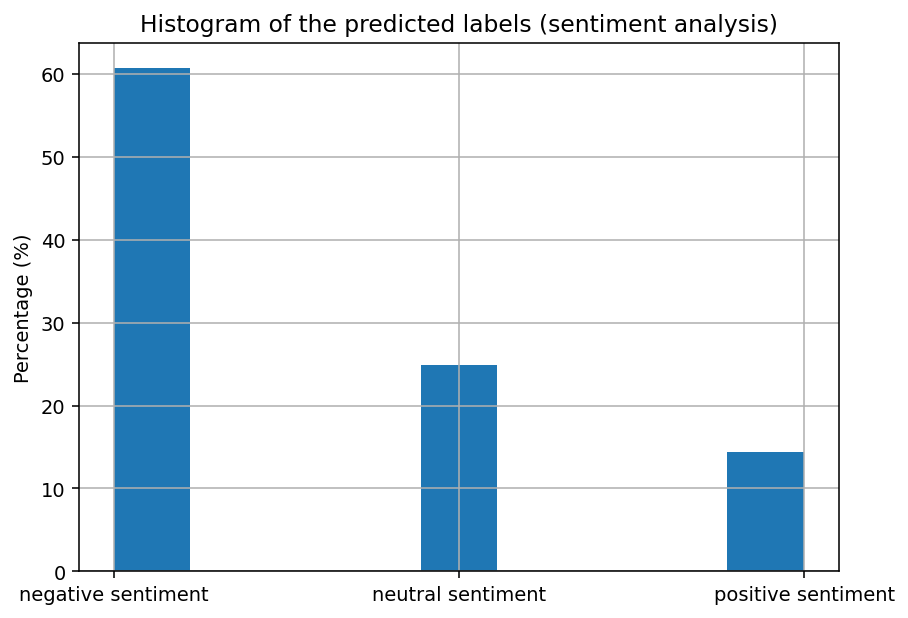

In [ ]:
x = np.arange(3)
bins = np.linspace(0, 2, 10)

fig, ax = plt.subplots (figsize=(7, 5), dpi=140)
plt.title ('Histogram of the predicted labels (sentiment analysis)')
#plt.hist (df ['messageSentiment.score'], bins, label=['label'] )

df['messageSentiment.score'].hist(bins=bins, weights=np.ones_like(df[df.columns[0]])*100./len(df))

ax.set_ylabel ('Percentage (%)')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids_sentiment.keys()))
#ax.legend (loc='upper right')
plt.show ()

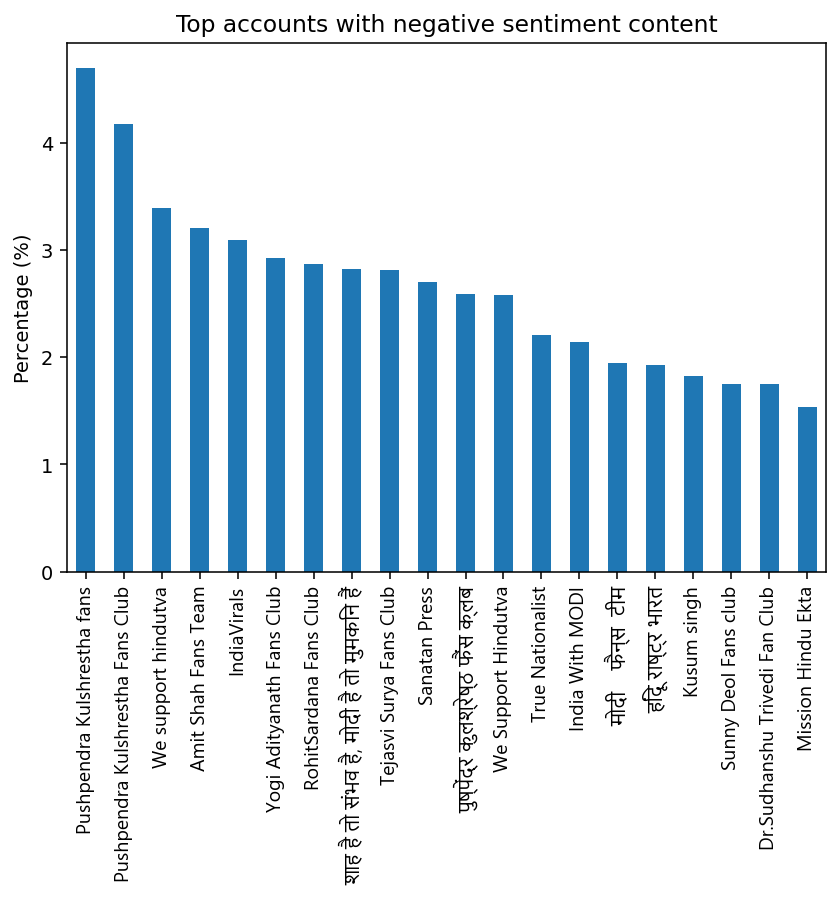

In [ ]:
plt.figure(figsize=(7,5),dpi=140)

negative_sentiment = df [df['messageSentiment.score'] == 0]
negative_sentiment_percent = negative_sentiment ['account.name'].value_counts()*100/len(negative_sentiment)
negative_sentiment_percent[:20].plot(kind='bar')


# Customize matplotlib
hindi_font = FontProperties(fname = '/content/drive/MyDrive/The-London-Story/Nirmala.ttf')

plt.xticks(fontproperties=hindi_font)
#plt.xticks(rotation = 60)

plt.title('Top accounts with negative sentiment content')
plt.ylabel('Percentage (%)')

plt.show()

## Hate speech analysis results

Overall statistics of hate speech predictions

In [ ]:
print ("Total number of non-hateful content within the dataset", len(df [df['messageHate.score'] == 0])*100/len(df),'%')
print ("Total number of hateful content within the dataset", len(df [df['messageHate.score'] == 1])*100/len(df),'%')

Total number of non-hateful content within the dataset 55.056 %
Total number of hateful content within the dataset 44.944 %


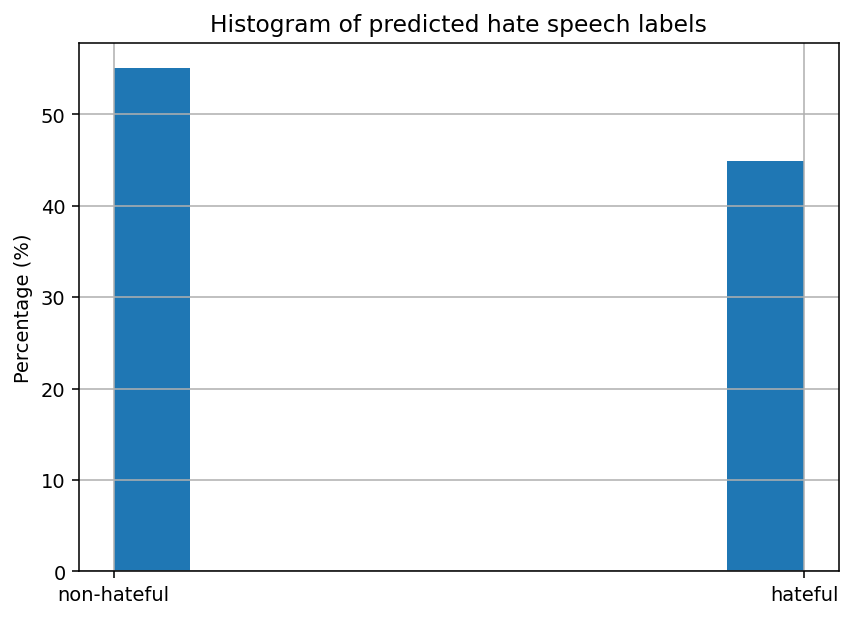

In [ ]:
x = np.arange(2)
bins = np.linspace(0, 1, 10)

fig, ax = plt.subplots (figsize=(7, 5), dpi=140)
plt.title ('Histogram of predicted hate speech labels')

df['messageHate.score'].hist(bins=bins, weights=np.ones_like(df[df.columns[0]])*100./len(df))

ax.set_ylabel ('Percentage (%)')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids_hate.keys()))
#ax.legend (loc='upper right')
plt.show ()

Bar plot of top actors

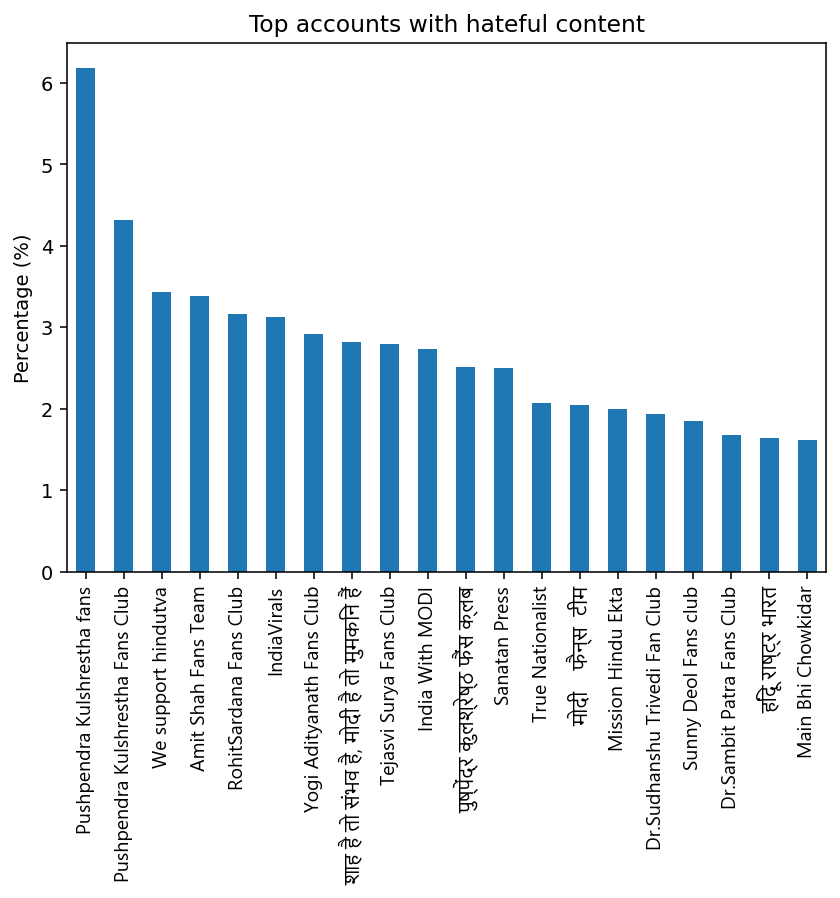

In [ ]:
plt.figure(figsize=(7,5),dpi=140)

hateful_content = df [df['messageHate.score'] == 1]
hateful_content_percent = hateful_content ['account.name'].value_counts()*100/len(hateful_content)
hateful_content_percent[:20].plot(kind='bar')


# Customize matplotlib
hindi_font = FontProperties(fname = '/content/drive/MyDrive/The-London-Story/Nirmala.ttf')

plt.xticks(fontproperties=hindi_font)
#plt.xticks(rotation = 60)

plt.title('Top accounts with hateful content')
plt.ylabel('Percentage (%)')

plt.show()